In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## reading data

In [68]:
data=pd.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ‘PassengerId’ as the index column

In [28]:
data = data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### basic details of the dataset

In [29]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### checking for null values

In [31]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 2 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    int64  
 1   Pclass    890 non-null    int64  
 2   Name      890 non-null    object 
 3   Sex       890 non-null    object 
 4   Age       890 non-null    float64
 5   SibSp     890 non-null    int64  
 6   Parch     890 non-null    int64  
 7   Ticket    890 non-null    object 
 8   Fare      890 non-null    float64
 9   Cabin     890 non-null    object 
 10  Embarked  890 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.4+ KB


### Filling all the missing values present in all the columns in the dataset

In [41]:
data=data.fillna(method='ffill') 

In [43]:
data=data.fillna(method='bfill')

In [44]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Check and handle outliers in at least 3 columns in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x1a85bab61f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a85bab68b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a85baa1e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1a85bab6f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a85bd14310>],
 'means': []}

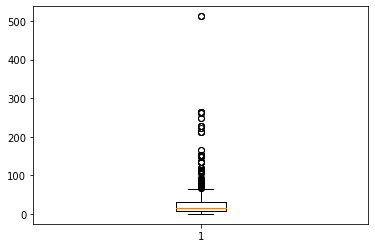

In [46]:
plt.boxplot(data['Fare']) #boxplot for fare column

7.8958
12.2875
25.925
low_limit is: -19.147999999999996
upper limit is: 52.9688
outlier is : [53.1, 53.1, 53.1, 53.1, 53.1]


{'whiskers': [<matplotlib.lines.Line2D at 0x1a85be93610>,
 'caps': [<matplotlib.lines.Line2D at 0x1a85be93cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a85be932b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a85be9f3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a85be9f730>],
 'means': []}

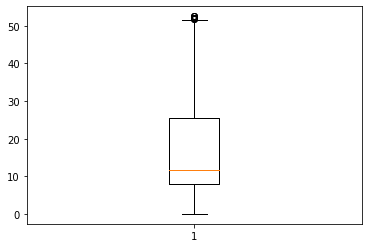

In [51]:
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upp_limit = Q3+1.5*IQR
print('low_limit is:',low_limit)
print('upper limit is:',upp_limit)
outlier =[]
for x in data['Fare']:
    if((x>upp_limit)or(x<low_limit)):
        outlier.append(x)
print("outlier is :", outlier)
#finding index of outlier
index=data['Fare'][(data['Fare']>upp_limit)|(data['Fare']<low_limit)].index

#dropping outlier
data.drop(index,inplace=True)
plt.boxplot(data['Fare'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a85bef1040>,
 'caps': [<matplotlib.lines.Line2D at 0x1a85bef1700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a85bee4ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a85bef1dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a85befe160>],
 'means': []}

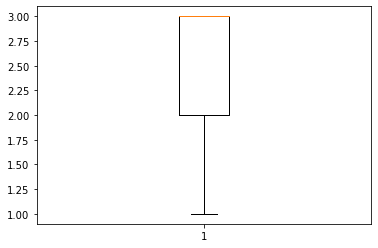

In [53]:
plt.boxplot(data['Pclass'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a85bfa7c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1a85bfb5370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a85bfa7910>],
 'medians': [<matplotlib.lines.Line2D at 0x1a85bfb5a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a85bfb5d90>],
 'means': []}

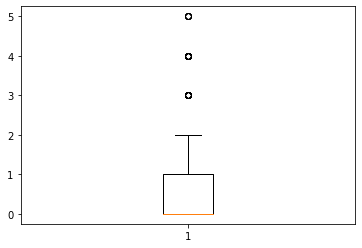

In [57]:
plt.boxplot(data['SibSp'])

0.0
0.0
1.0
SibSp low_limit is: -1.5
SibSp upper limit is: 2.5
SibSp outlier is : [3, 4, 3, 4, 5, 3, 4, 5, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 4, 3, 4, 4]


{'whiskers': [<matplotlib.lines.Line2D at 0x1a85c00ce20>,
 'caps': [<matplotlib.lines.Line2D at 0x1a85c019520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a85c00cac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a85c019be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a85c019f40>],
 'means': []}

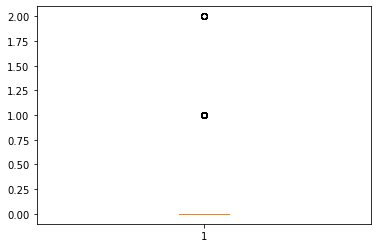

In [58]:
#handling outliers in SibSp
Q1 = np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upp_limit = Q3+1.5*IQR
print('SibSp low_limit is:',low_limit)
print('SibSp upper limit is:',upp_limit)
outlier =[]
for x in data['SibSp']:
    if((x>upp_limit)or(x<low_limit)):
        outlier.append(x)
print("SibSp outlier is :", outlier)
#finding index of outlier
index=data['SibSp'][(data['SibSp']>upp_limit)|(data['SibSp']<low_limit)].index

#dropping outlier
data.drop(index,inplace=True)
plt.boxplot(data['SibSp'])


### min max scaling on the feature set (Take ‘Survived’ as target)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 3 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  708 non-null    int64  
 1   Pclass    708 non-null    int64  
 2   Name      708 non-null    object 
 3   Sex       708 non-null    object 
 4   Age       708 non-null    float64
 5   SibSp     708 non-null    int64  
 6   Parch     708 non-null    int64  
 7   Ticket    708 non-null    object 
 8   Fare      708 non-null    float64
 9   Cabin     708 non-null    object 
 10  Embarked  708 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.4+ KB


In [61]:
le = LabelEncoder()
data['Name'] = le.fit_transform(data['Name'])
data['Ticket'] = le.fit_transform(data['Ticket'])
data['Cabin'] = le.fit_transform(data['Cabin'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Sex'] = le.fit_transform(data['Sex'])
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
3,1,3,266,0,26.0,0,0,603,7.9250,73,2
5,0,3,14,1,35.0,0,0,432,8.0500,52,2
6,0,3,436,1,35.0,0,0,241,8.4583,52,1
7,0,1,401,1,54.0,0,0,59,51.8625,120,2
9,1,3,313,0,27.0,0,2,309,11.1333,120,2
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,430,1,27.0,0,0,70,13.0000,65,2
888,1,1,228,0,19.0,0,0,10,30.0000,29,2
889,0,3,314,0,19.0,1,2,609,23.4500,29,2


In [63]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [69]:
min = MinMaxScaler(feature_range=(0,1))
x = min.fit_transform(x)
x

array([[1.        , 0.37623762, 0.        , ..., 0.1507967 , 0.53284672,
        1.        ],
       [1.        , 0.01980198, 1.        , ..., 0.1531752 , 0.37956204,
        1.        ],
       [1.        , 0.61669024, 1.        , ..., 0.16094432, 0.37956204,
        0.5       ],
       ...,
       [1.        , 0.44413013, 0.        , ..., 0.44620601, 0.21167883,
        1.        ],
       [0.        , 0.08486563, 1.        , ..., 0.57083925, 0.41605839,
        0.        ],
       [1.        , 0.24045262, 1.        , ..., 0.14746681, 0.41605839,
        0.5       ]])

##### 